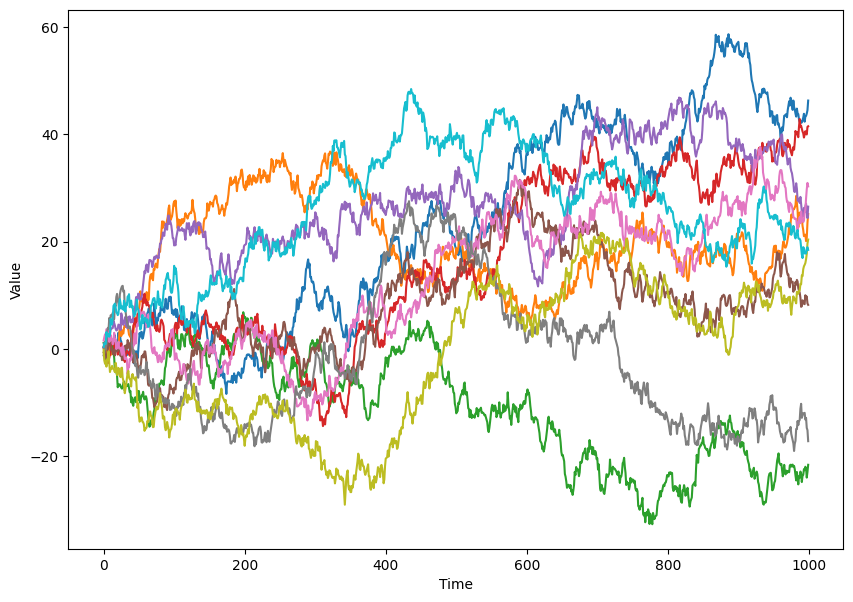

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

NUM_PATHS = 10
SAMPLES = 1000

MU = 0
SIGMA = 1

rng = np.random.default_rng()

def compute_wiener() -> list[float]:
    value = 0
    wiener = []

    for _ in range(SAMPLES):
        s = rng.normal(MU, SIGMA)
        value += s

        wiener.append(value)

    return wiener


df_data = {}
for i in range(NUM_PATHS):
    path = compute_wiener()
    df_data[f'WPath {i}'] = path

data = pd.DataFrame(df_data)

long_form = pd.melt(data.reset_index(), id_vars='index', var_name='Path', value_name='Value')
long_form.rename(columns={'index': 'Time'}, inplace=True)

plt.figure(figsize=(10, 7))
sns.lineplot(data=long_form, x='Time', y='Value', hue='Path')

plt.legend([], [], frameon=False)
plt.show()

      Time     Path     Value
0        0  WPath 0 -2.468488
1        1  WPath 0 -3.397927
2        2  WPath 0 -1.754653
3        3  WPath 0 -4.925620
4        4  WPath 0 -4.533638
...    ...      ...       ...
1995   995  WPath 1  1.227137
1996   996  WPath 1  0.521933
1997   997  WPath 1 -0.356910
1998   998  WPath 1 -0.969769
1999   999  WPath 1 -1.331046

[2000 rows x 3 columns]


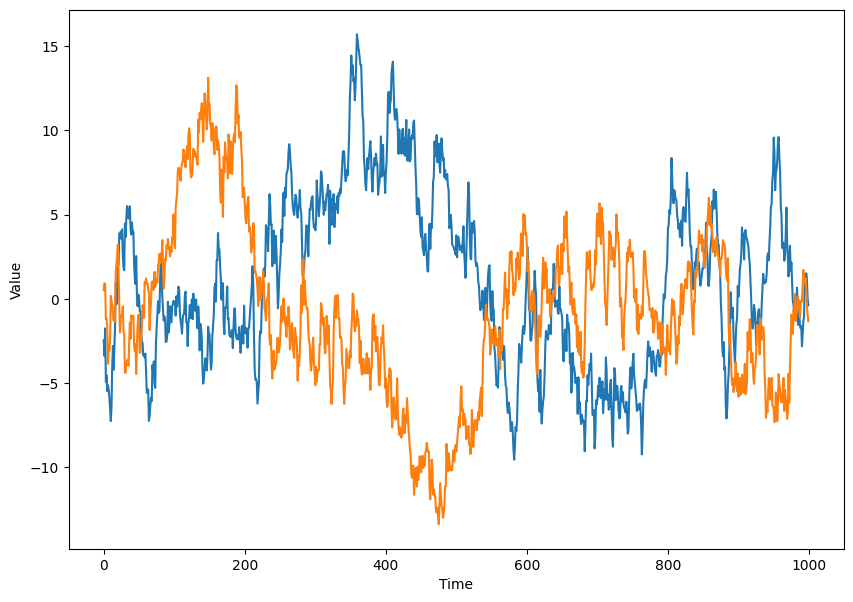

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

NUM_PATHS = 2
SAMPLES = 1000
THETA = 0.025
MEAN = 0

MU = 0
SIGMA = 1

rng = np.random.default_rng()

def compute_wiener() -> list[float]:
    value = 0
    wiener = []

    for _ in range(SAMPLES):
        mean_rev_term = -THETA * (value - MEAN)
        s = mean_rev_term + rng.normal(MU, SIGMA)
        value += s

        wiener.append(value)

    return wiener


df_data = {}
for i in range(NUM_PATHS):
    path = compute_wiener()
    df_data[f'WPath {i}'] = path

data = pd.DataFrame(df_data)

long_form = pd.melt(data.reset_index(), id_vars='index', var_name='Path', value_name='Value')
long_form.rename(columns={'index': 'Time'}, inplace=True)
print(long_form)

plt.figure(figsize=(10, 7))
sns.lineplot(data=long_form, x='Time', y='Value', hue='Path')

plt.legend([], [], frameon=False)
plt.show()

$PEP: possibly delisted; no price data found  (1m 2024-10-15 -> 2024-10-16) (Yahoo error = "1m data not available for startTime=1728964800 and endTime=1729051200. The requested range must be within the last 30 days.")
$KO: possibly delisted; no price data found  (1m 2024-10-15 -> 2024-10-16) (Yahoo error = "1m data not available for startTime=1728964800 and endTime=1729051200. The requested range must be within the last 30 days.")


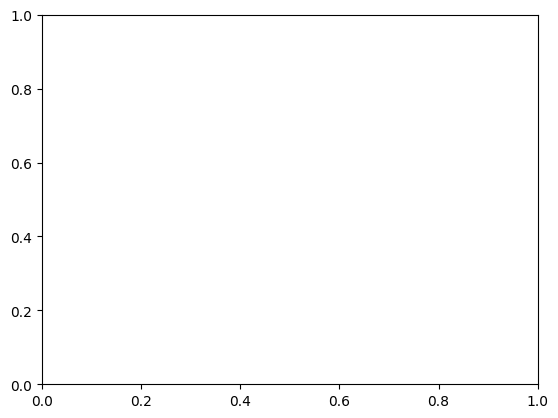

In [24]:
import yfinance

pepsi = yfinance.Ticker("PEP")
cocacola = yfinance.Ticker("KO")

START="2024-10-15"
END="2024-10-16"

pepsi_history = pepsi.history(start=START, end=END, interval="1m")
cocacola_history = cocacola.history(start=START, end=END, interval="1m")

pepsi_close_data = pepsi_history["Close"]
cocacola_close_data = cocacola_history["Close"]

spreads = []
for i in range(len(pepsi_close_data)):
    pepsi_close = pepsi_close_data.iloc[i]
    cocacola_close = cocacola_close_data.iloc[i]
    
    spread = pepsi_close - cocacola_close
    spreads.append(spread)

data = pd.DataFrame(spreads)

sns.lineplot(data=data)
plt.show()

In [25]:
import os
import math
import numpy as np
import pandas as pd

# calibrate an OU process on the spread

# identify different statistical periods and
# piece them together relative to zero?

# first, we get a mean value to revert to,
# this will be the simple arithmetic mean
# on the dataset, the variance will also
# be derived from the spreads

dataset = spreads
print(dataset)

VARIANCE = np.var(dataset)
MU = sum(dataset) / len(dataset)
EPOCHS = 100

NUM_DATASET = len(dataset)

def ou_process(theta) -> list[float]:
    value = 0
    values = []

    for _ in range(NUM_DATASET):
        brownian = rng.normal(MU, VARIANCE)
        mean_reversion = -theta * (value - MU) + math.e

        value += mean_reversion + brownian
        values.append(value)

    return values


def ou_calibration():
    theta = 0.05

    for _ in range(EPOCHS):
        values = ou_process(theta)

        # compare against dataset and find
        error = 0
        for index in range(NUM_DATASET):
            value = values[index]
            spread = dataset[index]

            error += (value - spread) ** 2

        error /= NUM_DATASET
        print(error)

        # Compute gradient



ou_calibration()

/home/filiptoth/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/filiptoth/.local/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/filiptoth/.local/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[]


ZeroDivisionError: division by zero

      Time     Path       Value
0        0  WPath 0    0.907674
1        1  WPath 0    2.102205
2        2  WPath 0    2.025320
3        3  WPath 0    0.990228
4        4  WPath 0    0.707074
...    ...      ...         ...
2511  2511  WPath 0  110.890479
2512  2512  WPath 0  111.877089
2513  2513  WPath 0  109.983892
2514  2514  WPath 0  111.790037
2515  2515  WPath 0  110.079165

[2516 rows x 3 columns]


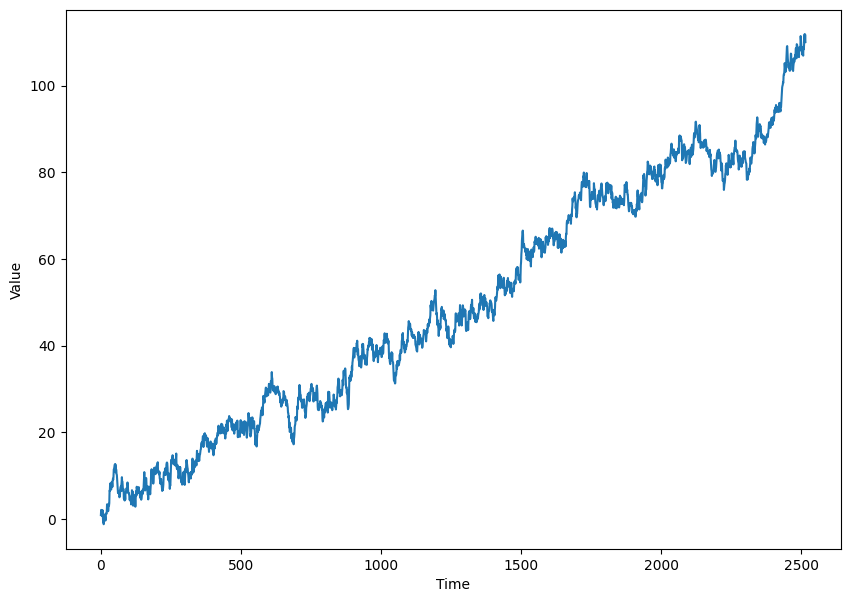

In [26]:
# OU with deterministic drift

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

NUM_PATHS = 1
SAMPLES = 2516
THETA = 0.025
MEAN = 0
DET_DRIFT = 0.001

MU = 0
SIGMA = 1

rng = np.random.default_rng()

def compute_ou() -> list[float]:
    value = 0
    wiener = []

    for t in range(SAMPLES):
        mean_rev_term = -THETA * (value - MEAN)
        det_drift = DET_DRIFT * t

        s = mean_rev_term + rng.normal(MU, SIGMA) + det_drift
        value += s

        wiener.append(value)

    return wiener


df_data = {}
for i in range(NUM_PATHS):
    path = compute_ou()
    df_data[f'WPath {i}'] = path

data = pd.DataFrame(df_data)

long_form = pd.melt(data.reset_index(), id_vars='index', var_name='Path', value_name='Value')
long_form.rename(columns={'index': 'Time'}, inplace=True)
print(long_form)

plt.figure(figsize=(10, 7))
sns.lineplot(data=long_form, x='Time', y='Value', hue='Path')

plt.legend([], [], frameon=False)
plt.show()